<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Covid 19 Project

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






# Covid 19 Python Project (use all your knowledge thus far to solve this)

From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).

In [45]:
import pandas as pd
import numpy as np

Q1. Write Python code to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-10-2020.csv')
display(df.head(5))
df.isnull().sum()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-11 04:23:46,33.93911,67.709953,39789,1477,33064,5248,Afghanistan,102.210880,3.712081
1,NaN,NaN,NaN,Albania,2020-10-11 04:23:46,41.15330,20.168300,15231,416,9406,5409,Albania,529.258461,2.731272
2,NaN,NaN,NaN,Algeria,2020-10-11 04:23:46,28.03390,1.659600,52940,1795,37170,13975,Algeria,120.726889,3.390631
3,NaN,NaN,NaN,Andorra,2020-10-11 04:23:46,42.50630,1.521800,2696,55,1814,827,Andorra,3489.290105,2.040059
4,NaN,NaN,NaN,Angola,2020-10-11 04:23:46,-11.20270,17.873900,6246,218,2716,3312,Angola,19.004287,3.490234


FIPS                   730
Admin2                 725
Province_State         176
Country_Region           0
Last_Update              0
Lat                     85
Long_                   85
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          85
Case-Fatality_Ratio     55
dtype: int64

Q2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [47]:
df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,39789,1477,33064,5248
Albania,15231,416,9406,5409
Algeria,52940,1795,37170,13975
Andorra,2696,55,1814,827
Angola,6246,218,2716,3312
...,...,...,...,...
West Bank and Gaza,43945,378,37240,6327
Winter Olympics 2022,0,0,0,0
Yemen,2051,595,1329,127


Q3. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [48]:
df[df['Country_Region'] == "China"][['Province_State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)

,Province_State,Confirmed,Deaths,Recovered
0,Anhui,991,6,985
1,Beijing,936,9,927
2,Chongqing,585,6,578
3,Fujian,415,1,400
4,Gansu,170,2,168
5,Guangdong,1858,8,1823
6,Guangxi,260,2,256
7,Guizhou,147,2,145
8,Hainan,171,6,165
9,Hebei,365,6,358


Q4. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [56]:
df.groupby(['Country_Region'])['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,1477
1,Albania,416
2,Algeria,1795
3,Andorra,55
4,Angola,218
...,...,...
192,West Bank and Gaza,378
193,Winter Olympics 2022,0
194,Yemen,595
195,Zambia,337


Q5. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [153]:
no_recovered = df.groupby('Country_Region')['Recovered'].sum()
no_recovered[no_recovered == 0].reset_index()

,Country_Region,Recovered
0,Antarctica,0
1,Kiribati,0
2,"Korea, North",0
3,MS Zaandam,0
4,Nauru,0
5,Palau,0
6,Samoa,0
7,Serbia,0
8,Summer Olympics 2020,0
9,Sweden,0


Q6. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.


In [154]:
df.groupby(['Country_Region', 'Province_State'])[['Deaths', 'Confirmed', 'Recovered', 'Active']].sum()

Deaths  \
Country_Region Province_State                                         
Australia      Australian Capital Territory                       3   
               New South Wales                                   53   
               Northern Territory                                 0   
               Queensland                                         6   
               South Australia                                    4   
...                                                             ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0   
               Scotland                                        4339   
               Turks and Caicos Islands                           6   
               Unknown                                           74   
               Wales                                           2700   

                                                             Confirmed  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                        113   
               New South Wales                                    4278   
               Northern Territory                                   33   
               Queensland                                         1161   
               South Australia                                     473   
...                                                                ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha          2   
               Scotland                                          38042   
               Turks and Caicos Islands                            696   
               Unknown                                               0   
               Wales                                             29654   

                                                             Recovered  Active  
Country_Region Province_State                                                   
Australia      Australian Capital Territory                        110       0  
               New South Wales                                       0    4225  
               Northern Territory                                   33       0  
               Queensland                                         1152       3  
               South Australia                                     466       3  
...                                                                ...     ...  
United Kingdom Saint Helena, Ascension and Tristan da Cunha          2       0  
               Scotland                                              0   35492  
               Turks and Caicos Islands                            672      18  
               Unknown                                               0       0  
               Wales                                                 0   27987  

[601 rows x 4 columns]

Q7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [160]:
d_cases = df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
d_cases = d_cases[d_cases['Deaths'] == d_cases['Confirmed']]
d_cases = d_cases[d_cases['Confirmed'] > 0]
d_cases = d_cases[d_cases['Active']==0]
d_cases = d_cases[d_cases['Recovered']==0]
print(d_cases)

Empty DataFrame
Columns: [Country_Region, Confirmed, Deaths, Recovered, Active]
Index: []


C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\1491657567.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_cases = df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


Q8.Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [161]:
d_cases = df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered',"Active"].sum().reset_index()
d_cases = d_cases[d_cases['Recovered'] == d_cases['Confirmed']]
d_cases = d_cases[d_cases['Confirmed'] > 0]
d_cases = d_cases[d_cases['Active']==0]
d_cases = d_cases[d_cases['Deaths']==0]
print(d_cases)

                       Country_Region  Confirmed  Deaths  Recovered  Active
70                            Grenada         24       0         24       0
76                           Holy See         12       0         12       0
128                         Nicaragua       4225     153       4225     886
149  Saint Vincent and the Grenadines         64       0         64       0
176                       Timor-Leste         28       0         28       0


C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\2143417972.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_cases = df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered',"Active"].sum().reset_index()


Q9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [127]:
discipline.sort_values(['Confirmed', 'Deaths', 'Recovered'], ascending=False)
discipline.nlargest(10, 'Confirmed')

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,7753210,213324,3062983,7536070
India,7053806,108334,6077976,867496
Brazil,5084513,150302,4502854,429585
Russia,1278245,22331,1011911,244003
Colombia,902747,27660,783131,91956
Argentina,883882,23581,709464,150837
Spain,861112,32929,150376,677807
Peru,846088,83825,733000,762263
Mexico,814328,83642,689377,41309


Q10. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\2030115806.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('Country_Region').sum().nlargest(5, 'Deaths')


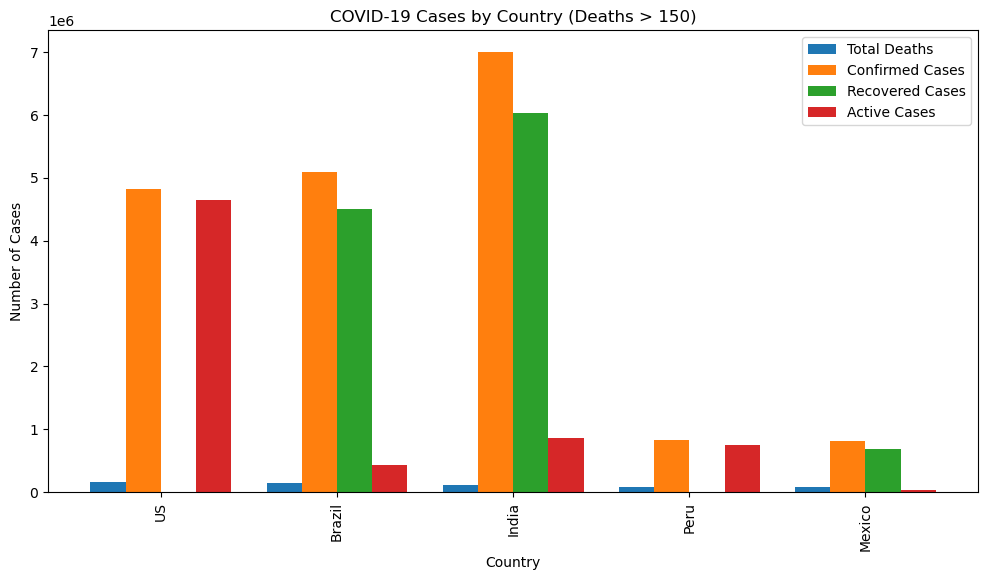

In [113]:
import numpy as np

filtered_data = df[df['Deaths'] > 150]
grouped_data = filtered_data.groupby('Country_Region').sum().nlargest(5, 'Deaths')

# Set the width of each group of bars
bar_width = 0.2

# Create an array of indices for the x-axis positions
x = np.arange(len(grouped_data.index))

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * bar_width, grouped_data['Deaths'], width=bar_width, label='Total Deaths')
plt.bar(x - 0.5 * bar_width, grouped_data['Confirmed'], width=bar_width, label='Confirmed Cases')
plt.bar(x + 0.5 * bar_width, grouped_data['Recovered'], width=bar_width, label='Recovered Cases')
plt.bar(x + 1.5 * bar_width, grouped_data['Active'], width=bar_width, label='Active Cases')

plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by Country (Deaths > 150)')
plt.xticks(x, grouped_data.index, rotation=90)
plt.legend()

plt.show()

Q.11  Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\1470296291.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = usa_data.groupby('Province_State').sum()


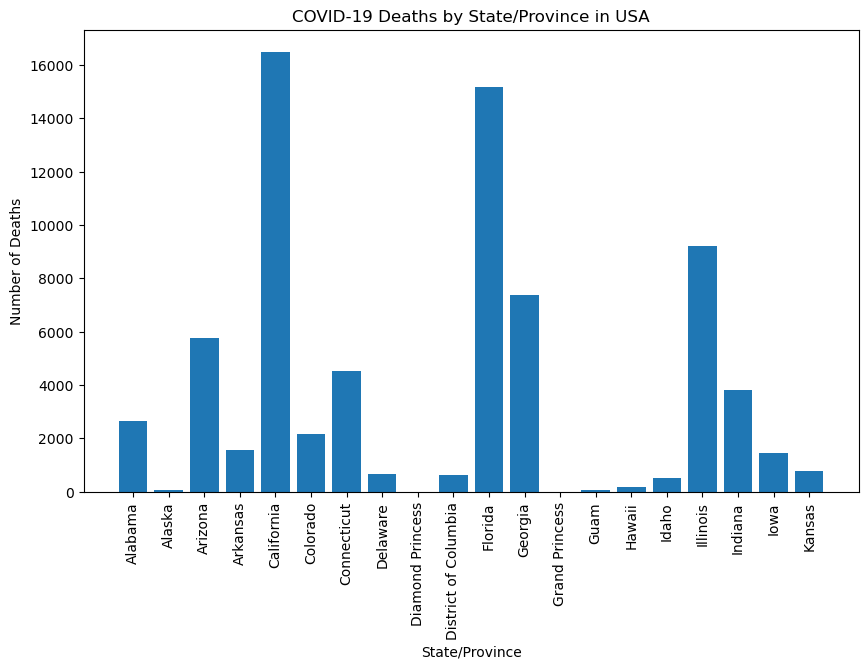

In [99]:
usa_data = df[df['Country_Region'] == 'US']

# Group the data by Province_State and calculate the sum of deaths
grouped_data = usa_data.groupby('Province_State').sum()

# Sort the data by total deaths in descending order
# Get the top 10 states/provinces with the highest death cases
top_states = grouped_data.head(20)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_states.index, top_states['Deaths'])

plt.xlabel('State/Province')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths by State/Province in USA')

plt.xticks(rotation=90)

plt.show()


Q.12 Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\3017012426.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = usa_data.groupby('Province_State').sum()


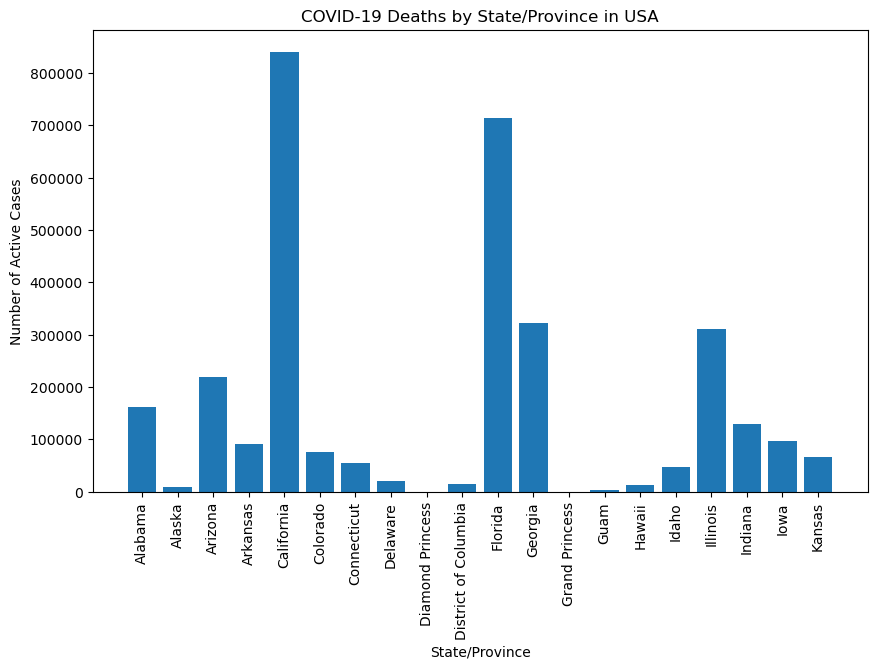

In [100]:
usa_data = df[df['Country_Region'] == 'US']

grouped_data = usa_data.groupby('Province_State').sum()
top_states = grouped_data.head(20)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_states.index, top_states['Active'])

plt.xlabel('State/Province')
plt.ylabel('Number of Active Cases')
plt.title('COVID-19 Deaths by State/Province in USA')

plt.xticks(rotation=90)

plt.show()

Q.13 Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_15756\3988635308.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('Province_State').sum().head(15)


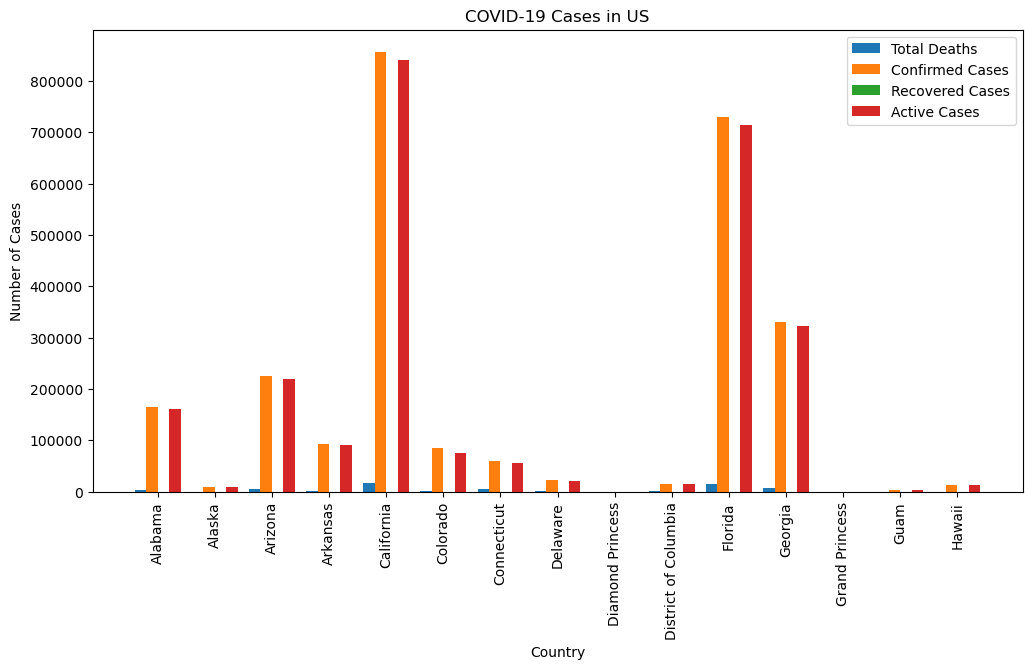

In [129]:
filtered_data = df[df['Country_Region'] == "US"]
grouped_data = filtered_data.groupby('Province_State').sum().head(15)

bar_width = 0.2

x = np.arange(len(grouped_data.index))

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * bar_width, grouped_data['Deaths'], width=bar_width, label='Total Deaths')
plt.bar(x - 0.5 * bar_width, grouped_data['Confirmed'], width=bar_width, label='Confirmed Cases')
plt.bar(x + 0.5 * bar_width, grouped_data['Recovered'], width=bar_width, label='Recovered Cases')
plt.bar(x + 1.5 * bar_width, grouped_data['Active'], width=bar_width, label='Active Cases')

plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in US')
plt.xticks(x, grouped_data.index, rotation=90)
plt.legend()

plt.show()

Q.14 Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time